In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly

In [13]:

plotly.tools.set_credentials_file(username='XXXXXXX', api_key='XXXXXXX')
mapbox_access_token = 'XXXXXXX'

In [14]:
satherGate =  [37.870219, -122.259491]

In [15]:
fruit = pd.read_csv("Wild Edibles in Berkeley.csv")
fruit = fruit.dropna()
fruit.head()

,Type,Location,LatLong
0,Apple,Strada,"37.869169, -122.254956"
1,Blackberry,Campanile,"37.872359, -122.258168"
2,Blackberry,Strawberry Creek,"37.872219, -122.262560"
3,Blackberry,VLSB Bridge,"37.872444, -122.262061"
4,Pomegranate,Parker and Ellsworth,"37.862825, -122.262786"


In [16]:
uniqueFruit = fruit['Type'].unique()

In [17]:
def reformatLatLong(LatLong):
    return LatLong.replace(' ','').split(',')

In [18]:
fruit['Coordinate'] = fruit['LatLong'].apply(reformatLatLong)

In [19]:
fruit.head()

,Type,Location,LatLong,Coordinate
0,Apple,Strada,"37.869169, -122.254956","[37.869169, -122.254956]"
1,Blackberry,Campanile,"37.872359, -122.258168","[37.872359, -122.258168]"
2,Blackberry,Strawberry Creek,"37.872219, -122.262560","[37.872219, -122.262560]"
3,Blackberry,VLSB Bridge,"37.872444, -122.262061","[37.872444, -122.262061]"
4,Pomegranate,Parker and Ellsworth,"37.862825, -122.262786","[37.862825, -122.262786]"


In [20]:
fruit['Lat'] = fruit['Coordinate'].apply(lambda x: x[0])
fruit['Long'] = fruit['Coordinate'].apply(lambda x: x[1])

In [21]:
fruit.head()

,Type,Location,LatLong,Coordinate,Lat,Long
0,Apple,Strada,"37.869169, -122.254956","[37.869169, -122.254956]",37.869169,-122.254956
1,Blackberry,Campanile,"37.872359, -122.258168","[37.872359, -122.258168]",37.872359,-122.258168
2,Blackberry,Strawberry Creek,"37.872219, -122.262560","[37.872219, -122.262560]",37.872219,-122.262560
3,Blackberry,VLSB Bridge,"37.872444, -122.262061","[37.872444, -122.262061]",37.872444,-122.262061
4,Pomegranate,Parker and Ellsworth,"37.862825, -122.262786","[37.862825, -122.262786]",37.862825,-122.262786


Text(0.5,1,'Edible Plants Found in Berkeley')

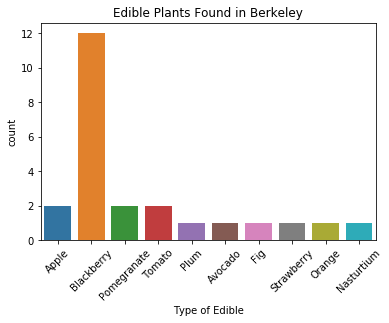

In [22]:
sns.countplot(x='Type',data=fruit)
plt.xticks(rotation=45)
plt.xlabel('Type of Edible')
plt.title('Edible Plants Found in Berkeley')

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go


data = []
for myFruit in uniqueFruit:
    
    relevantFruit = fruit[fruit['Type'] == myFruit]
    data += [
    go.Scattermapbox(
        lat=relevantFruit['Lat'],
        lon=relevantFruit['Long'],
        name = myFruit,
        mode='markers',
        marker=dict(
            size=9
        ),
        text=myFruit,
    )
]

In [24]:
layout = go.Layout(
    title='Edibles Near UC Berkeley',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=satherGate[0],
            lon=satherGate[1]
        ),
        pitch=0,
        zoom=13
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Edibles in Berkeley')